In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [ ]:
transform=transforms.ToTensor()

# transform=transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5),(0.5))
# ])

mnist_data=datasets.MNIST(root="./data",train=True,download=True,transform=transform)

data_loader=torch.utils.data.DataLoader(dataset=mnist_data,batch_size=64,shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
dataiter=iter(data_loader)
image,labels=dataiter.next()
print(torch.min(image),torch.max(image))
print(image.size())

tensor(0.) tensor(1.)
torch.Size([64, 1, 28, 28])


In [ ]:
class AutoEncoder_Linear(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder=nn.Sequential(
        nn.Linear(28*28,128), #28*28=784 -> 128
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,12),
        nn.ReLU(),
        nn.Linear(12,3)
    )

    self.decoder=nn.Sequential(
        nn.Linear(3,12), #3 -> 12
        nn.ReLU(),
        nn.Linear(12,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,784),
        nn.Sigmoid()  
    )

  def forward(self,x):
    encoder=self.encoder(x)
    decoder=self.decoder(encoder)
    return decoder

In [ ]:
model=AutoEncoder_Linear()
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-5)

In [ ]:
num_epochs=10
output=[]

for epoch in range(num_epochs):
  for (img,_) in data_loader:
    img=img.reshape(-1,28*28)
    recon=model(img)
    loss=criterion(recon,img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch : {epoch+1} , Loss : {loss.item():4f}')
  output.append((epoch,img,recon))

Epoch : 1 , Loss : 0.045818
Epoch : 2 , Loss : 0.043731
Epoch : 3 , Loss : 0.046605
Epoch : 4 , Loss : 0.036664
Epoch : 5 , Loss : 0.037224
Epoch : 6 , Loss : 0.037453
Epoch : 7 , Loss : 0.035777
Epoch : 8 , Loss : 0.032632
Epoch : 9 , Loss : 0.033921
Epoch : 10 , Loss : 0.034375


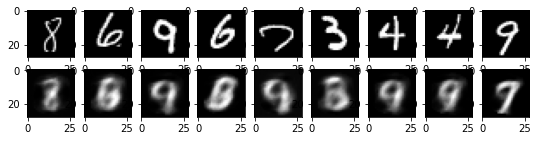

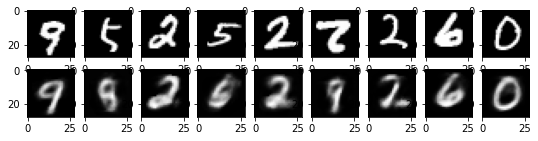

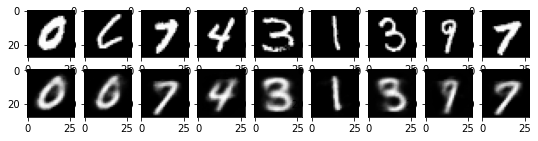

In [ ]:
for k in range(0,num_epochs,4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs=output[k][1].detach().numpy()
  recon=output[k][2].detach().numpy()

  for i,item in enumerate(imgs):
    if i>=9: break
    plt.subplot(2,9,i+1)
    item=item.reshape(-1,28,28)
    plt.imshow(item[0])


  for i,item in enumerate(recon):
    if i>=9: break
    plt.subplot(2,9,9+i+1)
    item=item.reshape(-1,28,28)
    plt.imshow(item[0])

In [ ]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()
    #N,1,28,28
    self.encoder=nn.Sequential(
        nn.Conv2d(1,16, 3,stride=2,padding=1), #in_channels=1,out_channels=16      (N,16,14,14)
        nn.ReLU(),
        nn.Conv2d(16,32,3,stride=2,padding=1), #(N,32,7,7)
        nn.ReLU(),
        nn.Conv2d(32,64,7) #(N,64,1,1)
    )

    #(N,64,1,1)
    self.decoder=nn.Sequential(
        nn.ConvTranspose2d(64,32, 7), #N,32,7,7
        nn.ReLU(),
        nn.ConvTranspose2d(32,16, 3,stride=2,padding=1,output_padding=1), #N,16,13,13
        nn.ReLU(),
        nn.ConvTranspose2d(16,1, 3,stride=2,padding=1,output_padding=1), #N,1,28,28
        nn.Sigmoid()  
    )

  def forward(self,x):
    encoder=self.encoder(x)
    decoder=self.decoder(encoder)
    return decoder

In [ ]:
model=AutoEncoder()
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-5)

In [ ]:
num_epochs=10
output=[]

for epoch in range(num_epochs):
  for (img,_) in data_loader:
    recon=model(img)
    loss=criterion(recon,img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch : {epoch+1} , Loss : {loss.item():4f}')
  output.append((epoch,img,recon))

Epoch : 1 , Loss : 0.011407
Epoch : 2 , Loss : 0.006237
Epoch : 3 , Loss : 0.004985
Epoch : 4 , Loss : 0.003507
Epoch : 5 , Loss : 0.003639
Epoch : 6 , Loss : 0.003785
Epoch : 7 , Loss : 0.003084
Epoch : 8 , Loss : 0.002614
Epoch : 9 , Loss : 0.002620
Epoch : 10 , Loss : 0.002945


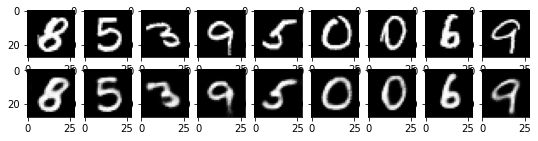

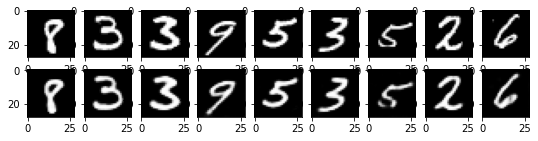

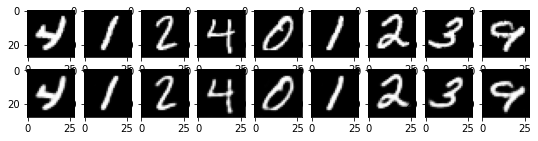

In [ ]:
for k in range(0,num_epochs,4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs=output[k][1].detach().numpy()
  recon=output[k][2].detach().numpy()

  for i,item in enumerate(imgs):
    if i>=9: break
    plt.subplot(2,9,i+1)
    plt.imshow(item[0])


  for i,item in enumerate(recon):
    if i>=9: break
    plt.subplot(2,9,9+i+1)
    plt.imshow(item[0])